# How Convolutional Neural Networks work

A convolutional Neural Network (CNN) is a special kind of neural network that can be trained to recognize patterns, classify images, detect objects, etc. There are many types of CNN architectures, such as LeNet, AlexNet, GoogLeNet, ResNet, VGG etc.

## For this project, 
we are going to use a simple CNN architecture which is trained to classify images.
Our LeNet-style CNN will have:
* 2 convolutional layers
* 2 pooling layers
* 1 flattening layer 
* 2 dense layers



In [15]:
# import tools
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## CIFAR10 Dataset
For the project, we are going to use CIFAR10 Dataset, which contains 60,000 color images in 10 different classes, 6,000 images per class.
There are 50,000 training images, and 10,000 testing images. There is no overlap between the classes.

In [16]:
# import data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

## Normalize pixel values
In image processing, normalization is a process during which we change tha range of each pixel, by reducing the value to the range from 0 to 1. We do this, because the computation of high numeric values can become very somplex and computationally expensive. If we reduce the number of each pixel to fit between 0 and 1, the numbers will be small, and the computation becomes easier and faster. We achieve that by dividing all pixel values by the largest pixel value: 255.

In [17]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## Data verification

To verify that the dataset is correct, we will plot first 25 images from the training set, and display class name below each image.

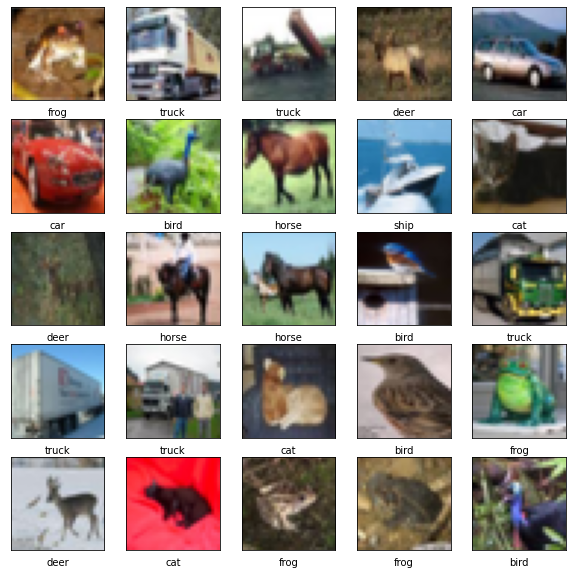

In [18]:
class_names = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

(-0.5, 722.5, 272.5, -0.5)

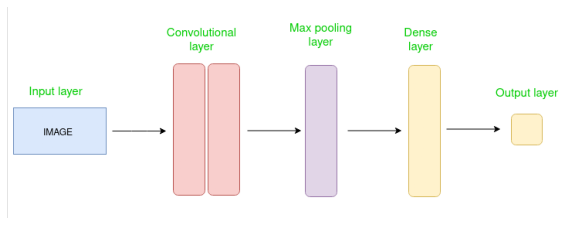

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("/kaggle/input/cnn-image/max.png")  
plt.figure(figsize=(10,10))
plt.imshow(img)                                         # display image
plt.axis('off')                                         # hide axes

## Create the convolutional base
We are going to use a common pattern, by stacking Conv2D and MaxPooling2D layers.

### Convolutional layers
Convolutional layers are building blocks of CNN. The first layer of a CNN is always a convolutional layer. A convolutional layer applies a filter (or kernel) to the input, and passes the result to the next layer. The filter is usually smaller that the image (most often, we can find 3x3 or 5x5 filters), and it moves across the image from top left to bottom right, detecting different features and simplifying the image before passing it onto the next layer.
With each convolutional layer, we have to use an activation function. In this project, we will use rectified linear activation function, or ReLU.

#### ReLU
ReLU is a linear function that became the default activation function for many types of neural networks, because it makes the model easy to train, doesn‘t get the vanishing gradient problem compared to Sigmoid and TanH, and often achieves better results.

#### Conv2D
There are many different types of convolutional layers, but 2D Convolution Layer (Conv2D) is the most common one. The filter "slides" over the 2D input data and multiplies each pixel. As a result, it sums up everything to a single output pixel. 

#### Input shape
As input, CNN takes tensors of shape `(image_height, image_width, color_channels)`. 
For color images, color channels are RGB (red, green, blue). The format of CIFAR images is (32, 32, 3), so that‘s what we will pass to the CNN.


### Pooling layers
Pooling layer is a new layer added after the ReLU convolutional layer. Pooling layer is used to reduce the dimensions of the features maps, and the number of parameters for the algorithm to learn. In other words, pooling layer summarizes and simplifies the output generated by the convolutional layer.

#### MaxPooling
Average pooling smooths out the image, and thus the sharp features required for image recognition may be lost. MaxPooling, on the other hand, selects brighter pixels. In other words, MaxPooling returns the maximum value from the portion of the image covered by a filter. 


In [19]:
#instantiate the model
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation="relu", input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))

In [20]:
# display the architecture of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________



## Additional layers

### Flatten layers
Flatten layers convert 2D arrays from the pooling layers. It makes it easier to interpret, and less prone to overfitting.

### Dense layers
To complete the model, we will feed the last output tensor from the convolutional base into one or more dense layers (also called fully-connected layers) to perform classification. In a dense layer, each neuron receives input from all the neurons of previous layer. CIFAR has 10 output classes, so we use a final dense layer with 10 outputs.

In [21]:
# add flatten and dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

## Compile and train a model
When we compile a model, we use two functions: optimizer and loss. 

### Loss function
Loss function calculates the difference between the current and the expected output. In other words, loss function evaluates how well an algorithm modelled the data. The closer the predictions are to the actual results, the lower the number of the loss function. The most common loss functions are cross-entropy loss, mean squared error, and hinge loss. For the current project, we will use `sparse categorical crossentropy`.
Sparse categorical crossentropy is a loss function that is used when the classes are mutually exclusive: each sample belongs only to one class, and there is no overlap (just like the case with our dataset). 

### Optimizer funtion
Optimizers are algorithms that are used to change the attributes, such as weight and learning rate, of a neural network to reduce the losses. In other words, optimizers help to get the results faster.There are two families of optimizers: gradient descent and adaptive. 

* Gradient Descent
>Examples of Gradient Descent Optimizers:
Batch gradient descent, Stochastic gradient descent, Mini-batch gradient descent.

The most basic and most commonly used optimization algorithm, particularly for linear regression and classification problems. It calculates how the weights should be adjusted so that the function can reach a *minima*. It is easy to compute, easy to implement, and easy to understand, but can trap you at the local  minima (not the real smallest point), and does not perform well on large datasets. Out of the Gradient Descent Optimizers, mini-batch gradient is considered to be the best option.


* Adaptive optimizers
> Examples of adaptive optimizers: Adagrad, Adadelta, RMSprop, Adam.

These optimizers were created to solve the issues of gradient descent algorithms. The main feature that distinguishes them from gradient descent optimizers is that they don‘t need tuning of the learning rate value. Adaptive Moment Estimation (Adam) is considered to be the best optimizer overall: it is fast, converges rapidly, and also rectifies vanishing  learning rate and high variance. The main disadvantage of Adam, however, is that can be computationally costly.

In [23]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

## Fitting the model
When we fit the model, we can see the history of its training process. The process of neural network training is counted in `epochs`. An `epoch` is a hyperparameter that describes the number of times that the learning algorithm will work through the entire training dataset.  The number of epochs for each model differs, but the optimal number of epochs to train most of the datasets is considered to be 11. The main risk of having too many epochs is that the rest error begins to increase, because the model starts to memorize the training set after to many iterations.


In [24]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4772 - accuracy: 0.4603 - val_loss: 1.2422 - val_accuracy: 0.5530
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1149 - accuracy: 0.6063 - val_loss: 1.0968 - val_accuracy: 0.6177
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9674 - accuracy: 0.6589 - val_loss: 1.0073 - val_accuracy: 0.6429
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8750 - accuracy: 0.6920 - val_loss: 0.9089 - val_accuracy: 0.6879
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7947 - accuracy: 0.7210 - val_loss: 0.9228 - val_accuracy: 0.6768
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7370 - accuracy: 0.7413 - val_loss: 0.8505 - val_accuracy: 0.7081
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6866 - accuracy: 0.7573 - val_loss: 0.8642 - val_accuracy:

## Evaluate the model

313/313 - 1s - loss: 0.8919 - accuracy: 0.7025


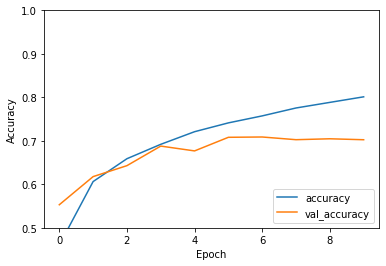

In [25]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc="lower right")

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [26]:
print(test_acc)

0.7024999856948853
